## Exploratory Data Analysis (EDA) - Introducing lags

#### In this notebook we provide a statistical data analysis not solely based on raw data but on their 10 observations slot mentioned in the Challenge Description

In [26]:
import os

import sys

from pathlib import Path


parent = Path(os.path.abspath("")).resolve().parents[0]

if parent not in sys.path:
    sys.path.insert(0, str(parent))

In [27]:
import copy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import colorcet as cc

import warnings
warnings.filterwarnings("ignore")

In [28]:
from ml.utils.data_utils import read_data, generate_time_lags

### We read the full dataset

In [29]:
up = pd.read_csv("../dataset/upstream.csv")
mid = pd.read_csv("../dataset/midstream.csv")
down = pd.read_csv("../dataset/downstream.csv")

up['District'] = 'upstream'
mid['District'] = 'midstream'
down['District'] = 'downstream'

combined_df = pd.concat([up, mid, down], ignore_index=True)

combined_df.to_csv("../dataset/full_dataset.csv", index=False)

In [30]:
df = read_data("../dataset/full_dataset.csv")

In [31]:
len(df.loc[df.District == "upstream"]), len(df.loc[df.District == "midstream"]), len(df.loc[df.District == "downstream"])

(4246, 4289, 4272)

In [32]:
df

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen,District
time,,,,,,,,,,
2022-02-05 16:00:00,16.190001,6.92,7.44,218.830002,22.180000,3.49,0.772,0.1540,4.136,upstream
2022-10-22 20:00:00,26.790001,7.31,8.06,134.539993,8.640000,2.45,0.025,0.0320,1.511,upstream
2022-01-10 16:00:00,19.860001,7.25,7.66,191.940002,16.959999,3.02,0.032,0.0542,2.820,upstream
2022-10-24 12:00:00,27.150000,7.19,8.37,134.190002,9.840000,2.45,0.025,0.0314,1.299,upstream
2023-08-31 00:00:00,29.809999,6.18,3.86,96.489998,19.150000,2.73,0.097,0.0974,2.681,upstream
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 16:00:00,25.719999,8.59,12.64,184.289993,16.959999,5.37,0.025,0.0530,1.308,downstream
2023-07-16 08:00:00,32.150002,6.81,2.79,180.699997,16.930000,4.48,0.231,0.0810,1.411,downstream
2023-07-25 00:00:00,30.930000,6.84,6.25,132.669998,18.920000,5.73,0.033,0.1300,1.295,downstream


### We generate data points that include 10 observations to be used as our prediction materials

In [33]:
df_lags_X = generate_time_lags(df, 10)

In [34]:
df_lags_X.head()

,TotalNitrogen_lag-10,TotalPhosphorus_lag-10,AmmoniaNitrogen_lag-10,PermanganateIndex_lag-10,Turbidity_lag-10,Conductivity_lag-10,DissolvedOxygen_lag-10,pH_lag-10,temp_lag-10,TotalNitrogen_lag-9,...,TotalNitrogen_lag-1,TotalPhosphorus_lag-1,AmmoniaNitrogen_lag-1,PermanganateIndex_lag-1,Turbidity_lag-1,Conductivity_lag-1,DissolvedOxygen_lag-1,pH_lag-1,temp_lag-1,District
time,,,,,,,,,,,,,,,,,,,,,
2023-11-19 20:00:00,4.136,0.1540,0.772,3.49,22.180000,218.830002,7.44,6.92,16.190001,1.511,...,3.547,0.1992,0.457,3.28,38.970001,125.760002,5.19,6.63,24.620001,upstream
2020-12-29 16:00:00,1.511,0.0320,0.025,2.45,8.640000,134.539993,8.06,7.31,26.790001,2.820,...,1.667,0.0590,0.025,1.95,9.580000,103.330002,8.35,6.78,24.260000,upstream
2022-04-28 04:00:00,2.820,0.0542,0.032,3.02,16.959999,191.940002,7.66,7.25,19.860001,1.299,...,1.250,0.0410,0.042,3.52,6.000000,139.600006,8.46,7.33,20.000000,upstream
2023-03-22 04:00:00,1.299,0.0314,0.025,2.45,9.840000,134.190002,8.37,7.19,27.150000,2.681,...,2.027,0.0650,0.086,3.87,13.340000,182.380005,6.34,6.93,27.510000,upstream
2020-12-30 04:00:00,2.681,0.0974,0.097,2.73,19.150000,96.489998,3.86,6.18,29.809999,2.479,...,2.284,0.0440,0.025,3.27,6.940000,172.649994,7.22,7.73,25.110001,upstream


In [35]:
df_lags_y = generate_time_lags(df, 10, is_y=True)

In [36]:
df_lags_y.head()

,temp,pH,DissolvedOxygen,Conductivity,Turbidity,PermanganateIndex,AmmoniaNitrogen,TotalPhosphorus,TotalNitrogen,District
time,,,,,,,,,,
2023-11-19 20:00:00,24.260000,6.78,8.35,103.330002,9.58,1.95,0.025,0.059,1.667,upstream
2020-12-29 16:00:00,20.000000,7.33,8.46,139.600006,6.00,3.52,0.042,0.041,1.250,upstream
2022-04-28 04:00:00,27.510000,6.93,6.34,182.380005,13.34,3.87,0.086,0.065,2.027,upstream
2023-03-22 04:00:00,25.110001,7.73,7.22,172.649994,6.94,3.27,0.025,0.044,2.284,upstream
2020-12-30 04:00:00,19.000000,7.32,8.88,143.500000,7.10,3.44,0.050,0.045,1.370,upstream


In [37]:
len(df_lags_X), len(df_lags_y)

(12777, 12777)

### Printing scatter plots for all the new generated time lags and exery base station.

In [38]:
def scatter_plot(df, x_axis, y_axis, district):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.ticklabel_format(style='plain')

    sns.scatterplot(x=df[x_axis], y=df[y_axis])

    ax.set_title(district + ' '+ x_axis + ' per ' + y_axis, fontsize = 15, loc='center')
    ax.set_ylabel(y_axis, fontsize = 13)
    ax.set_xlabel(x_axis, fontsize = 13)
    plt.tick_params(axis='x', which='major', labelsize=12)
    plt.tick_params(axis='y', which='major', labelsize=10)
    ax.yaxis.tick_left() # where the y axis marks will be
    plt.yticks(rotation=30)
    plt.show()
    plt.close()

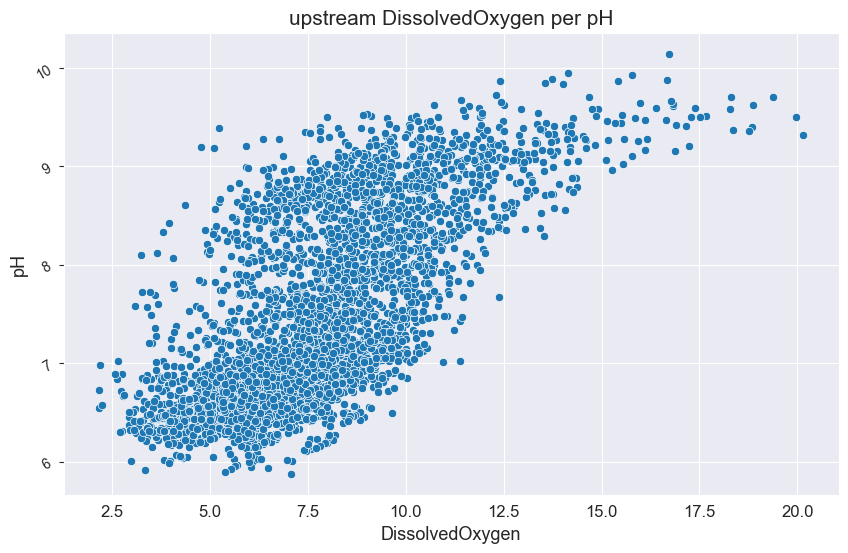

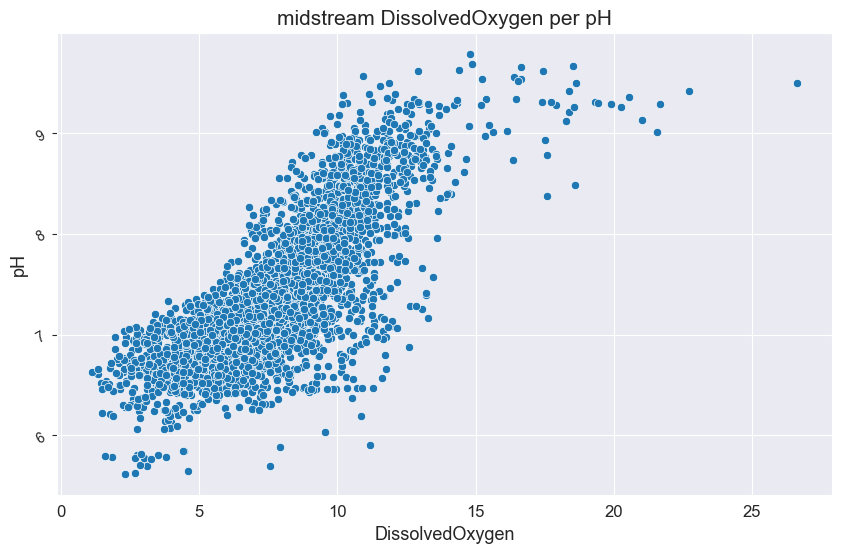

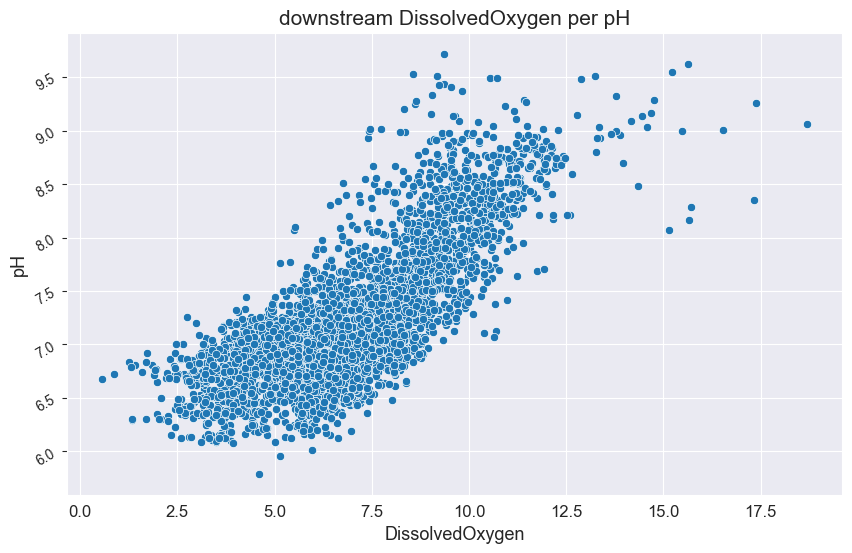

In [39]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    scatter_plot(tmp, "DissolvedOxygen", "pH", district)

### Printing continuous time series for every base station

In [40]:
def sci_format(x,lim):
    return '{:.1e}'.format(x)

def distribution_plot(df, x_axis, district, bins=None):
    major_formatter = FuncFormatter(sci_format)
    fig, ax = plt.subplots(figsize=(10,6))
    
    sns.histplot(df[x_axis], kde=True, 
                 bins=bins, alpha=.4, edgecolor=(1, 1, 1, .4),
                 stat="count", kde_kws=dict(cut=3),
                )

    ax.set_xlabel("Uplink")
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.tick_left() 
    plt.tight_layout()
    plt.show()
    plt.close()

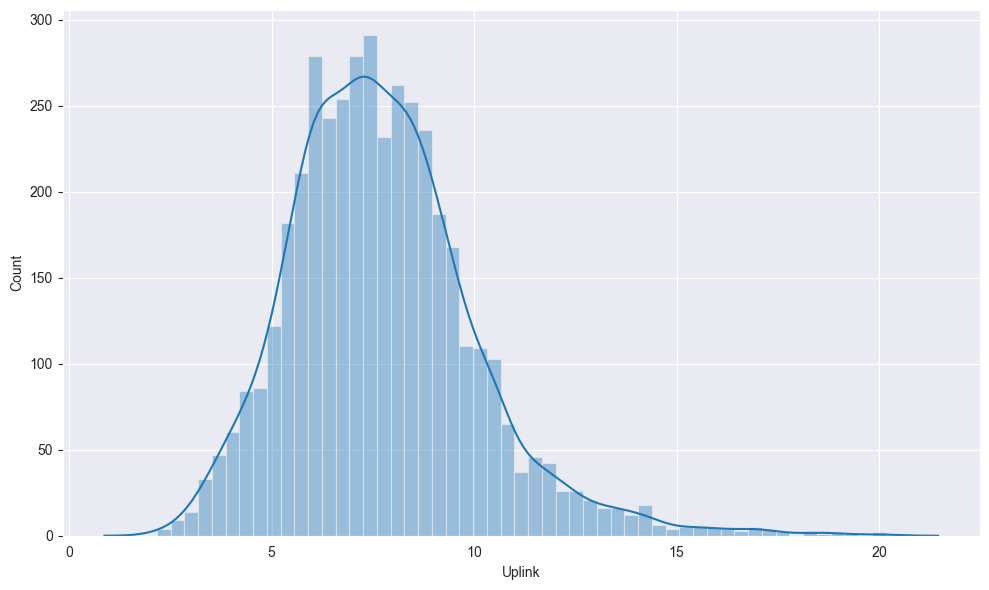

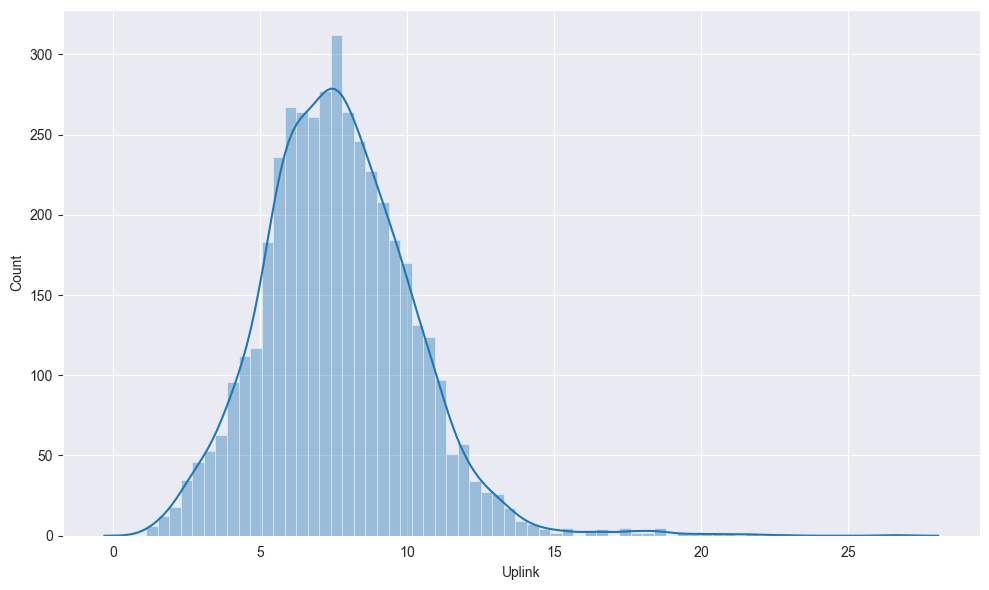

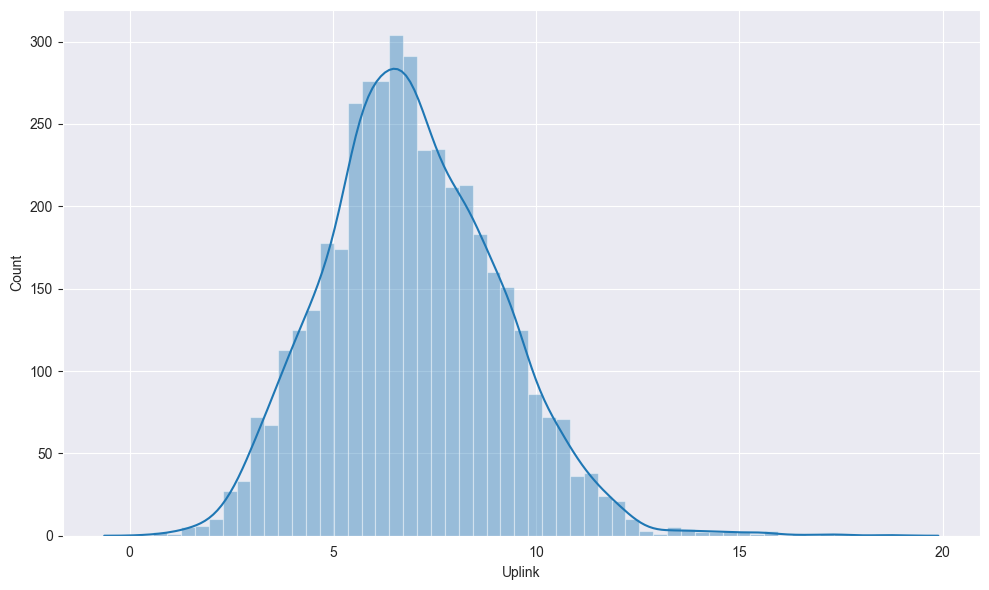

In [41]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    distribution_plot(tmp, "DissolvedOxygen", district=district, bins='auto')

### A closer look to every base station by cutting off some extreme outliers

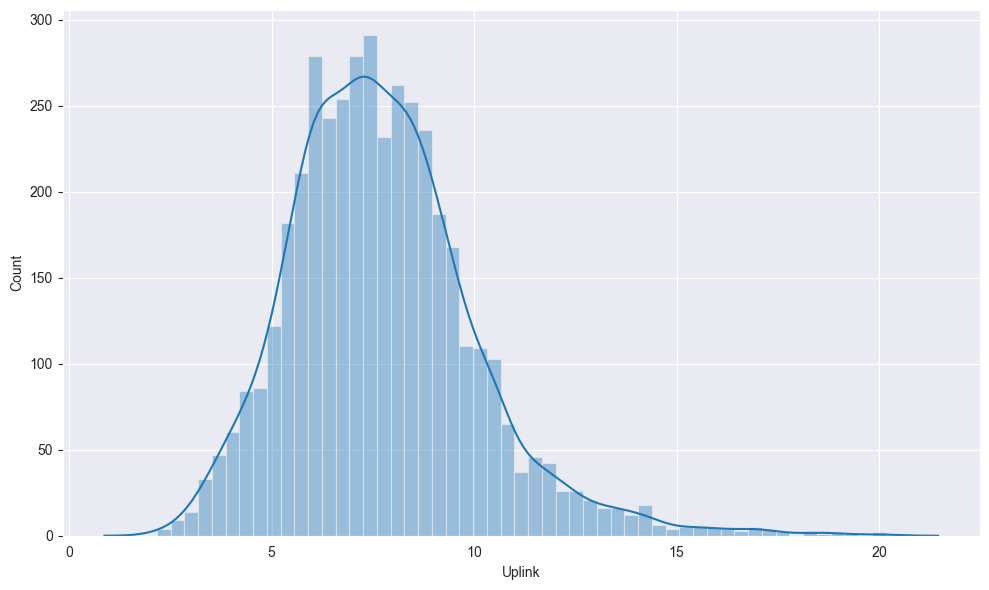

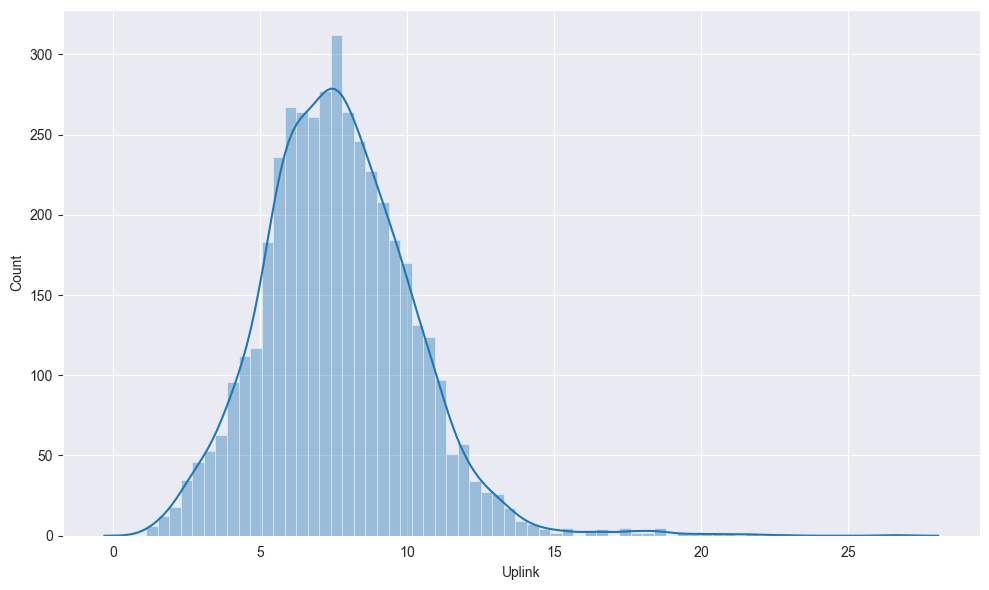

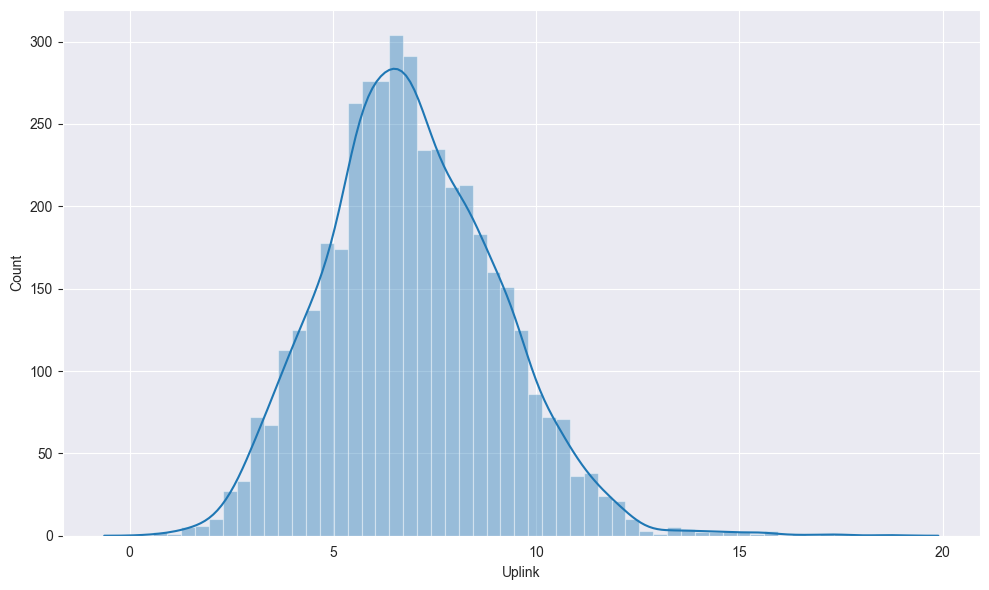

In [42]:
tmp_df = copy.deepcopy(df_lags_y)
tmp_df = tmp_df.loc[tmp_df.DissolvedOxygen <= 10000000]
for district in df_lags_y.District.unique():
    tmp = tmp_df.loc[tmp_df.District == district]
    distribution_plot(tmp, "DissolvedOxygen", district=district, bins='auto')

### Printing useful statistics about skewness, kurtosis for every base station dataset 

In [43]:
def get_stats(df, col, district):
    print(f"\tSkewness [{col}]: {df[col].skew()}")
    print(f"\tKurtosis: [{col}]: {df[col].kurt()}")
    print(f"\tMean: {df[col].mean()}, Median: {df[col].median()}, Mode: {df[col].mode().values[0]}")

In [44]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    print("Area:", district)
    get_stats(tmp, "DissolvedOxygen", district=district)
    get_stats(tmp, "pH", district=district)
    print("\n")

Area: upstream
	Skewness [DissolvedOxygen]: 0.9193834066390991
	Kurtosis: [DissolvedOxygen]: 2.112112045288086
	Mean: 7.726445198059082, Median: 7.505000114440918, Mode: 6.599999904632568
	Skewness [pH]: 0.6864555478096008
	Kurtosis: [pH]: -0.7264800667762756
	Mean: 7.435127258300781, Median: 7.110000133514404, Mode: 6.889999866485596


Area: midstream
	Skewness [DissolvedOxygen]: 0.7375944256782532
	Kurtosis: [DissolvedOxygen]: 2.631430149078369
	Mean: 7.648050785064697, Median: 7.510000228881836, Mode: 6.360000133514404
	Skewness [pH]: 0.8795408010482788
	Kurtosis: [pH]: 0.5948752760887146
	Mean: 7.369376182556152, Median: 7.21999979019165, Mode: 7.039999961853027


Area: downstream
	Skewness [DissolvedOxygen]: 0.3960789144039154
	Kurtosis: [DissolvedOxygen]: 0.6380255818367004
	Mean: 6.943426132202148, Median: 6.820000171661377, Mode: 6.409999847412109
	Skewness [pH]: 1.0177985429763794
	Kurtosis: [pH]: 0.8724416494369507
	Mean: 7.240638256072998, Median: 7.099999904632568, Mode: 7.